# Importing Libraries & Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import pickle as pk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [46]:
train=pd.read_csv('/kaggle/input/cat-in-the-dat/train.csv')
test=pd.read_csv('/kaggle/input/cat-in-the-dat/test.csv')
id=test['id']
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [5]:
train.shape

(300000, 25)

In [6]:
test.shape

(200000, 24)

# Explore Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [8]:
train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [9]:
train.dtypes

id         int64
bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [10]:
train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,149999.500000,0.127503,0.256607,0.383223,1.479567,3.007817,5.771113,0.30588
std,86602.684716,0.333537,0.436761,0.486173,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,74999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.00000
50%,149999.500000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.00000
75%,224999.250000,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.00000
max,299999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.00000


In [11]:
train.describe(include='O').transpose()

,count,unique,top,freq
bin_3,300000,2,T,153535
bin_4,300000,2,Y,191633
nom_0,300000,3,Green,127341
nom_1,300000,6,Trapezoid,101181
nom_2,300000,6,Lion,101295
nom_3,300000,6,Russia,101123
nom_4,300000,4,Oboe,92293
nom_5,300000,222,f7821e391,2801
nom_6,300000,522,d173ac7ca,1218
nom_7,300000,1220,3a114adea,534


# Check Null Values

In [12]:
train.isna().sum()

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [14]:
train.isna().values.any()

False

# Duplicated values

In [15]:
train[train.duplicated()]

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target


In [3]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


# Data Analysis & Visualization

In [17]:
train['target'].value_counts()

0    208236
1     91764
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

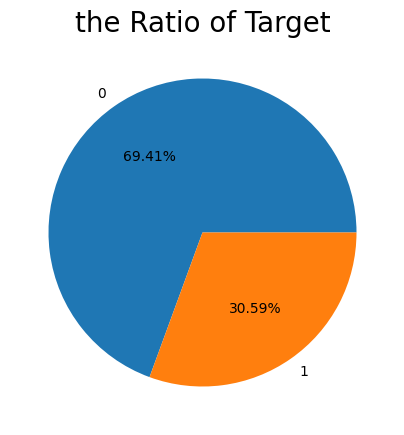

In [19]:
plt.figure(figsize=(5,5))
plt.pie(x =train['target'].value_counts() ,autopct='%1.2f%%' ,labels=train['target'].value_counts().index)
plt.title('the Ratio of Target',fontsize=20)
plt.show

**the dataset is imbalanced, as the number of occurrences of the two values is significantly different.**

In [44]:
for col in ['bin_0','bin_1','bin_2','bin_3','bin_4']:
    print(f'Distribution For {col}\n')
    print(train[col].value_counts())
    print(f'\nTarget Frequency For {col}\n')
    print(train.groupby([col,'target'])['target'].count())
    print('*'*20)

Distribution For bin_0

0    261749
1     38251
Name: bin_0, dtype: int64

Target Frequency For bin_0

bin_0  target
0      0         181786
       1          79963
1      0          26450
       1          11801
Name: target, dtype: int64
********************
Distribution For bin_1

0    223018
1     76982
Name: bin_1, dtype: int64

Target Frequency For bin_1

bin_1  target
0      0         149434
       1          73584
1      0          58802
       1          18180
Name: target, dtype: int64
********************
Distribution For bin_2

0    185033
1    114967
Name: bin_2, dtype: int64

Target Frequency For bin_2

bin_2  target
0      0         129238
       1          55795
1      0          78998
       1          35969
Name: target, dtype: int64
********************
Distribution For bin_3

T    153535
F    146465
Name: bin_3, dtype: int64

Target Frequency For bin_3

bin_3  target
F      0         101151
       1          45314
T      0         107085
       1          46450
Name

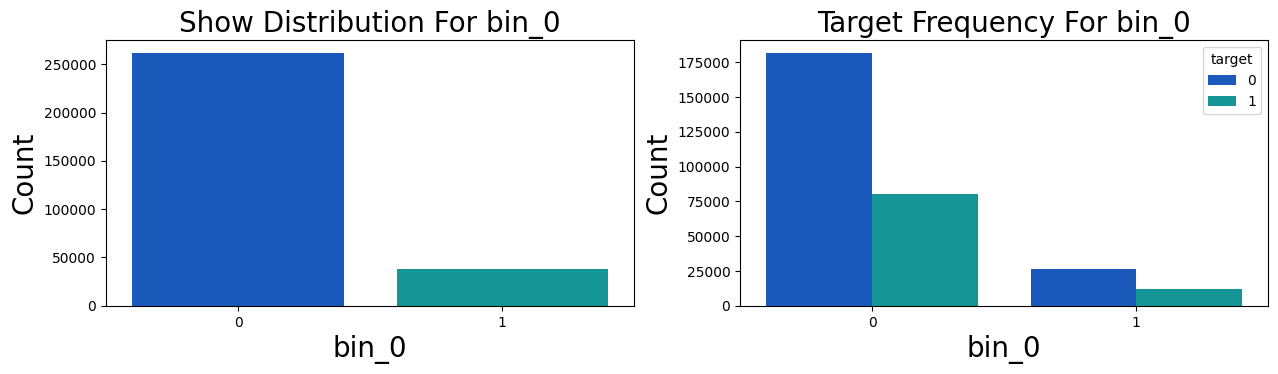

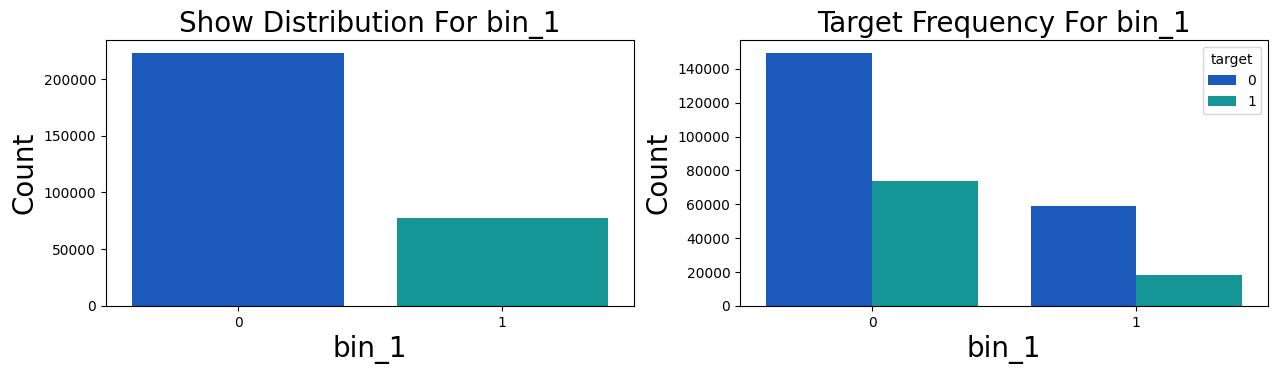

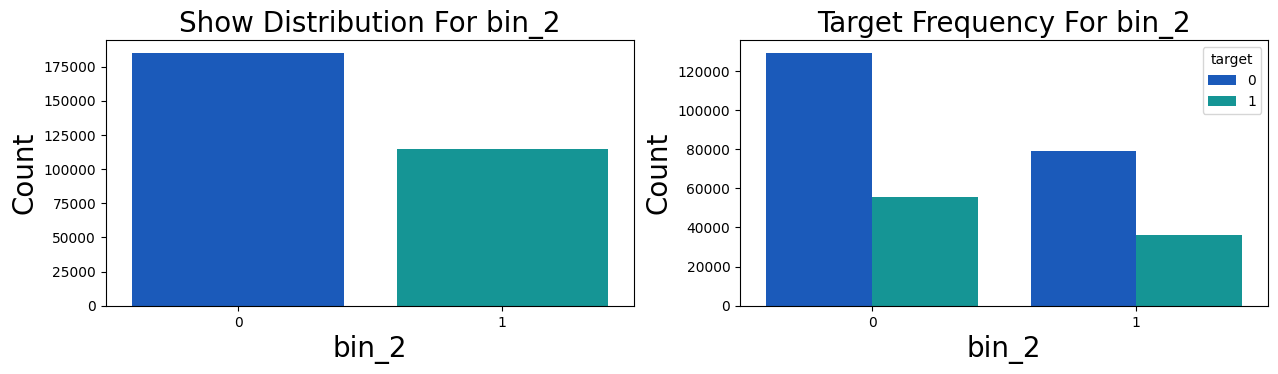

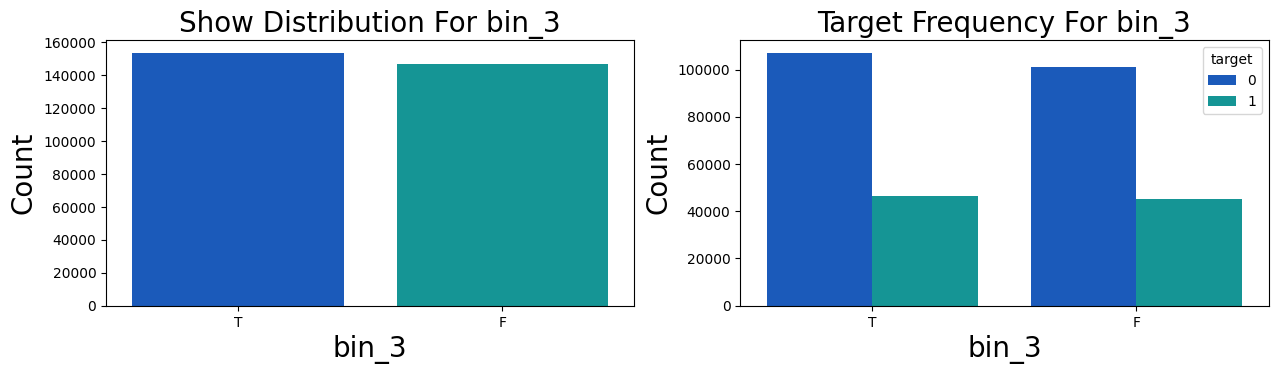

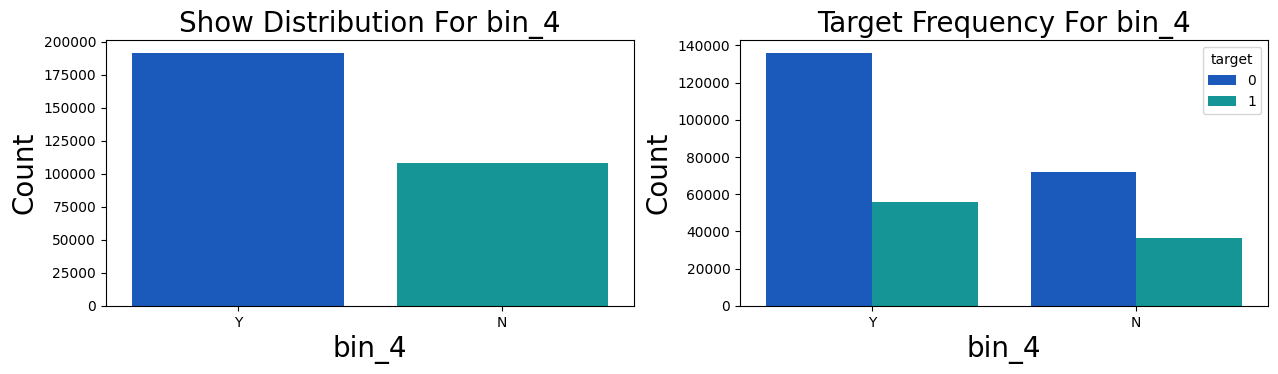

In [45]:
x=1
for col in ['bin_0','bin_1','bin_2','bin_3','bin_4']:
    plt.figure(figsize=(15,20))
    plt.subplot(5,2,x)
    sns.countplot(x =train[col], palette='winter')
    plt.title(f'Show Distribution For {col}',fontsize=20)
    plt.xlabel(f'{col}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    x+=1
    plt.subplot(5,2,x)
    sns.countplot(x =train[col],hue=train['target'],palette='winter')
    plt.title(f'Target Frequency For {col}',fontsize=20)
    plt.xlabel(f'{col}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    x+=1

In [47]:
for col in ['nom_0','nom_1','nom_2','nom_3','nom_4']:
    print(f'Distribution For {col}\n')
    print(train[col].value_counts())
    print(f'\nTarget Frequency For {col}\n')
    print(train.groupby([col,'target'])['target'].count())
    print('*'*20)

Distribution For nom_0

Green    127341
Blue      96166
Red       76493
Name: nom_0, dtype: int64

Target Frequency For nom_0

nom_0  target
Blue   0         72914
       1         23252
Green  0         85682
       1         41659
Red    0         49640
       1         26853
Name: target, dtype: int64
********************
Distribution For nom_1

Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64

Target Frequency For nom_1

nom_1      target
Circle     0         28152
           1          9168
Polygon    0         24741
           1         11402
Square     0         32787
           1         16810
Star       0         31645
           1         14259
Trapezoid  0         71833
           1         29348
Triangle   0         19078
           1         10777
Name: target, dtype: int64
********************
Distribution For nom_2

Lion       101295
Cat         49659
Snake       45979
Dog   

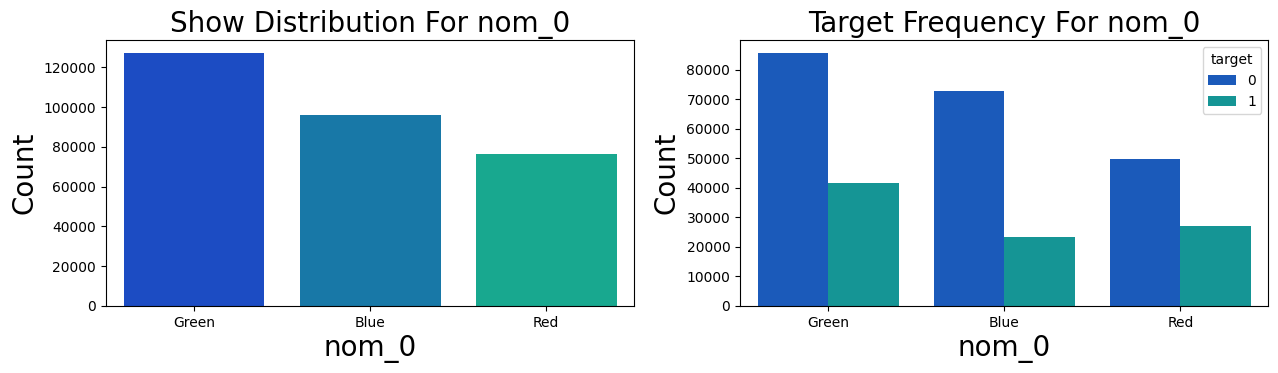

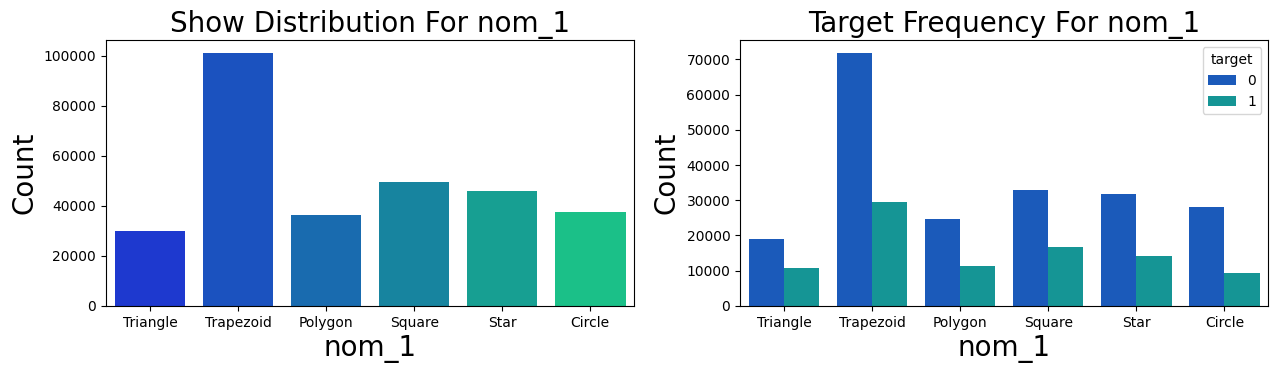

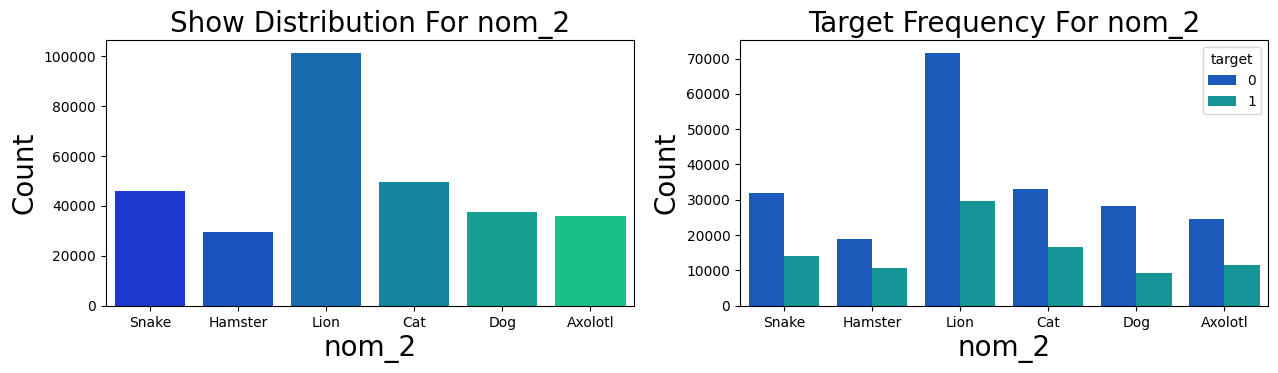

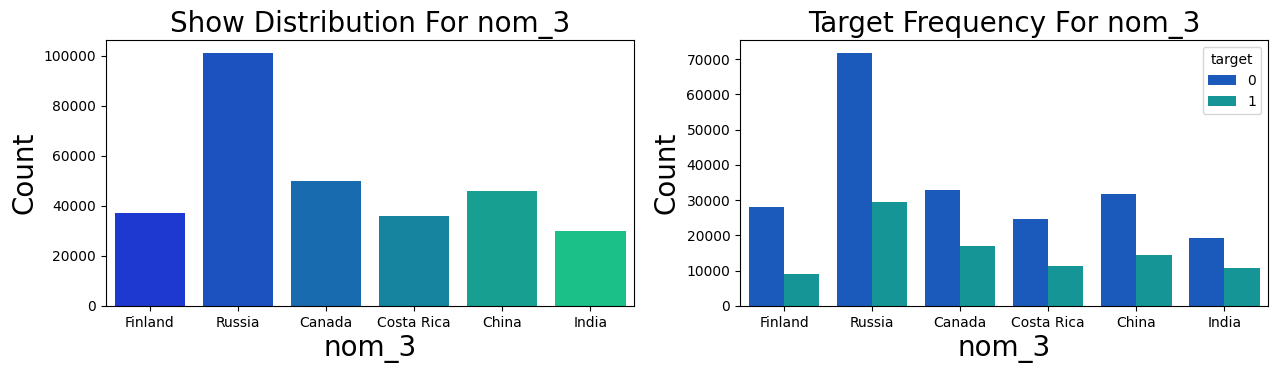

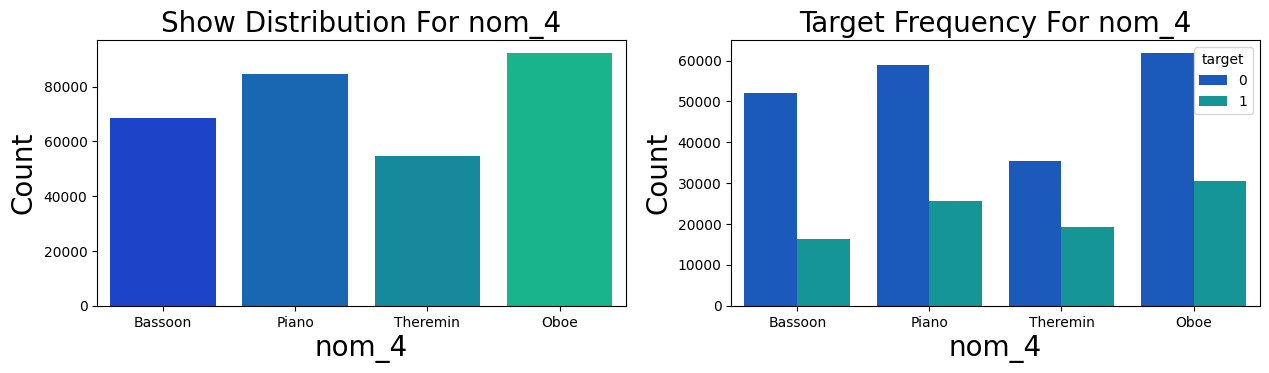

In [48]:
x=1
for col in ['nom_0','nom_1','nom_2','nom_3','nom_4']:
    plt.figure(figsize=(15,20))
    plt.subplot(5,2,x)
    sns.countplot(x =train[col], palette='winter')
    plt.title(f'Show Distribution For {col}',fontsize=20)
    plt.xlabel(f'{col}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    x+=1
    plt.subplot(5,2,x)
    sns.countplot(x =train[col],hue=train['target'],palette='winter')
    plt.title(f'Target Frequency For {col}',fontsize=20)
    plt.xlabel(f'{col}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    x+=1

In [52]:
for col in ['ord_0','ord_1','ord_2','ord_3','ord_4']:
    print(f'Distribution For {col}\n')
    print(train[col].value_counts())
    print(f'\nTarget Frequency For {col}\n')
    print(train.groupby([col,'target'])['target'].count())
    print('*'*20)

Distribution For ord_0

1    194846
2     66438
3     38716
Name: ord_0, dtype: int64

Target Frequency For ord_0

ord_0  target
1      0         140646
       1          54200
2      0          44202
       1          22236
3      0          23388
       1          15328
Name: target, dtype: int64
********************
Distribution For ord_1

Novice         126583
Grandmaster     77428
Contributor     42871
Master          28053
Expert          25065
Name: ord_1, dtype: int64

Target Frequency For ord_1

ord_1        target
Contributor  0         30930
             1         11941
Expert       0         17115
             1          7950
Grandmaster  0         46156
             1         31272
Master       0         18092
             1          9961
Novice       0         95943
             1         30640
Name: target, dtype: int64
********************
Distribution For ord_2

Freezing       99816
Lava Hot       63908
Boiling Hot    60627
Cold           33768
Hot            22227
War

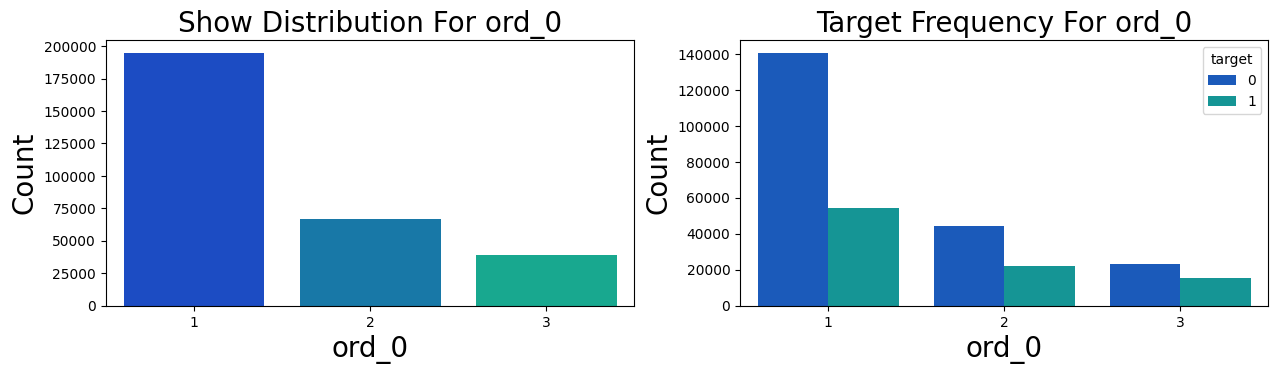

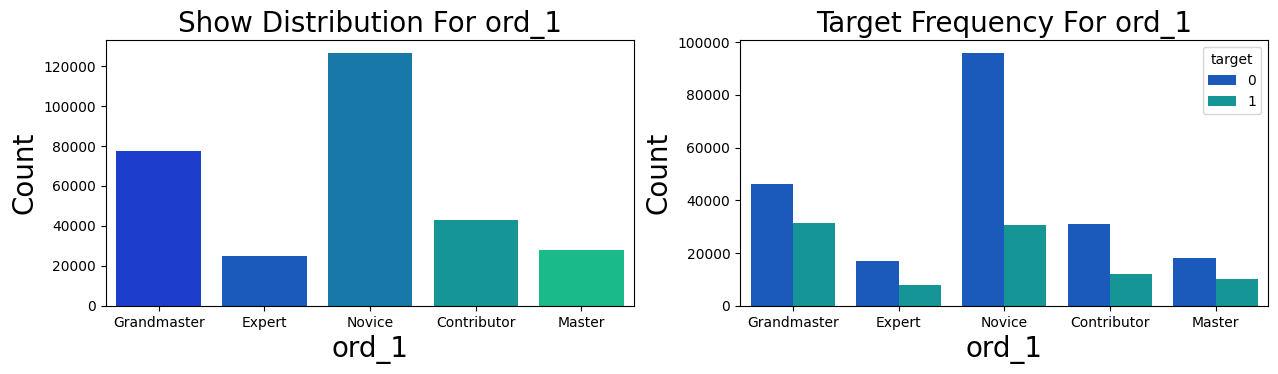

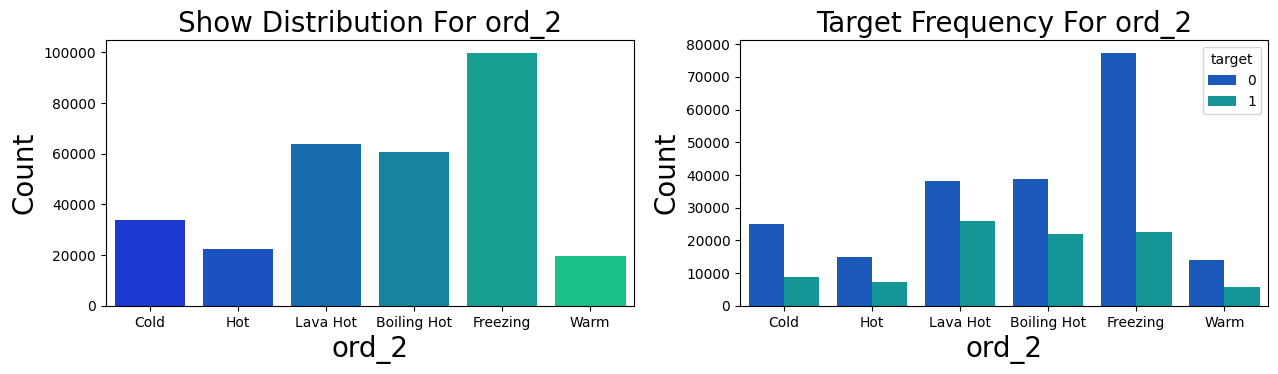

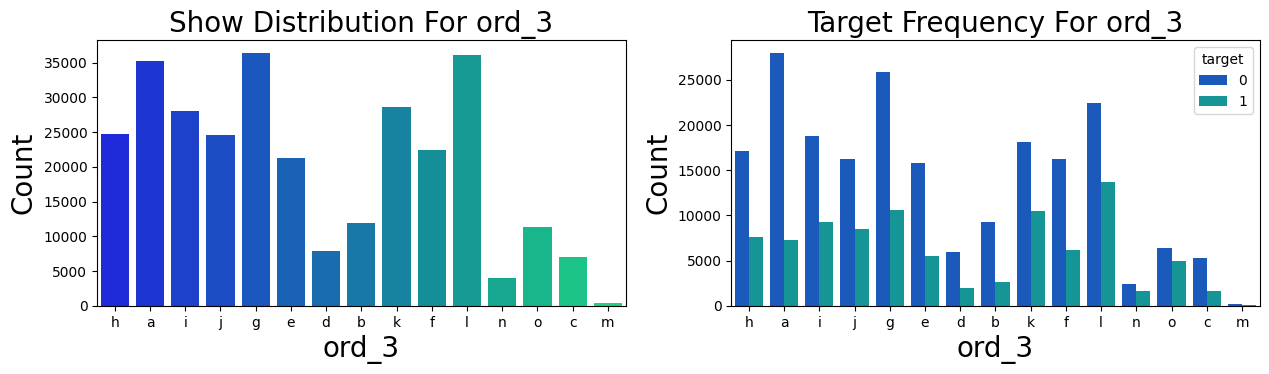

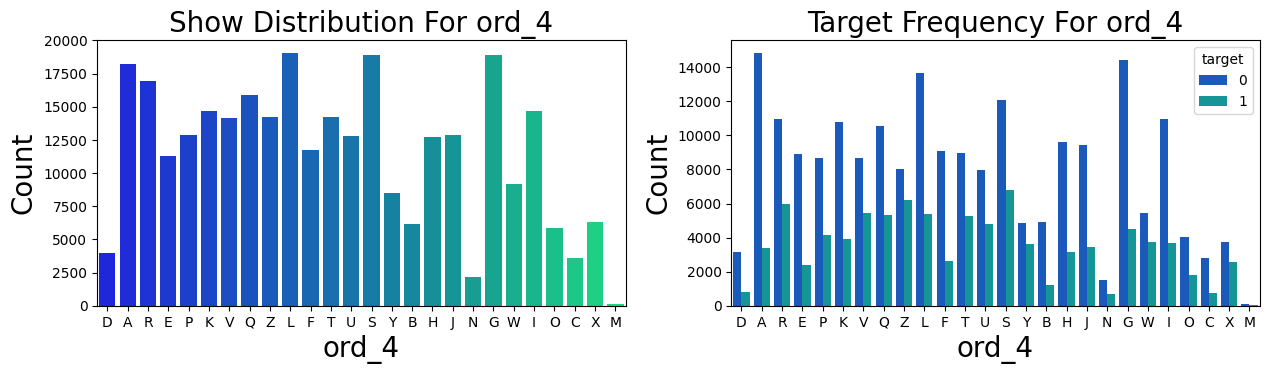

In [53]:
x=1
for col in ['ord_0','ord_1','ord_2','ord_3','ord_4']:
    plt.figure(figsize=(15,20))
    plt.subplot(5,2,x)
    sns.countplot(x =train[col], palette='winter')
    plt.title(f'Show Distribution For {col}',fontsize=20)
    plt.xlabel(f'{col}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    x+=1
    plt.subplot(5,2,x)
    sns.countplot(x =train[col],hue=train['target'],palette='winter')
    plt.title(f'Target Frequency For {col}',fontsize=20)
    plt.xlabel(f'{col}',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    x+=1

#  Check the Distribution and skewness of the features

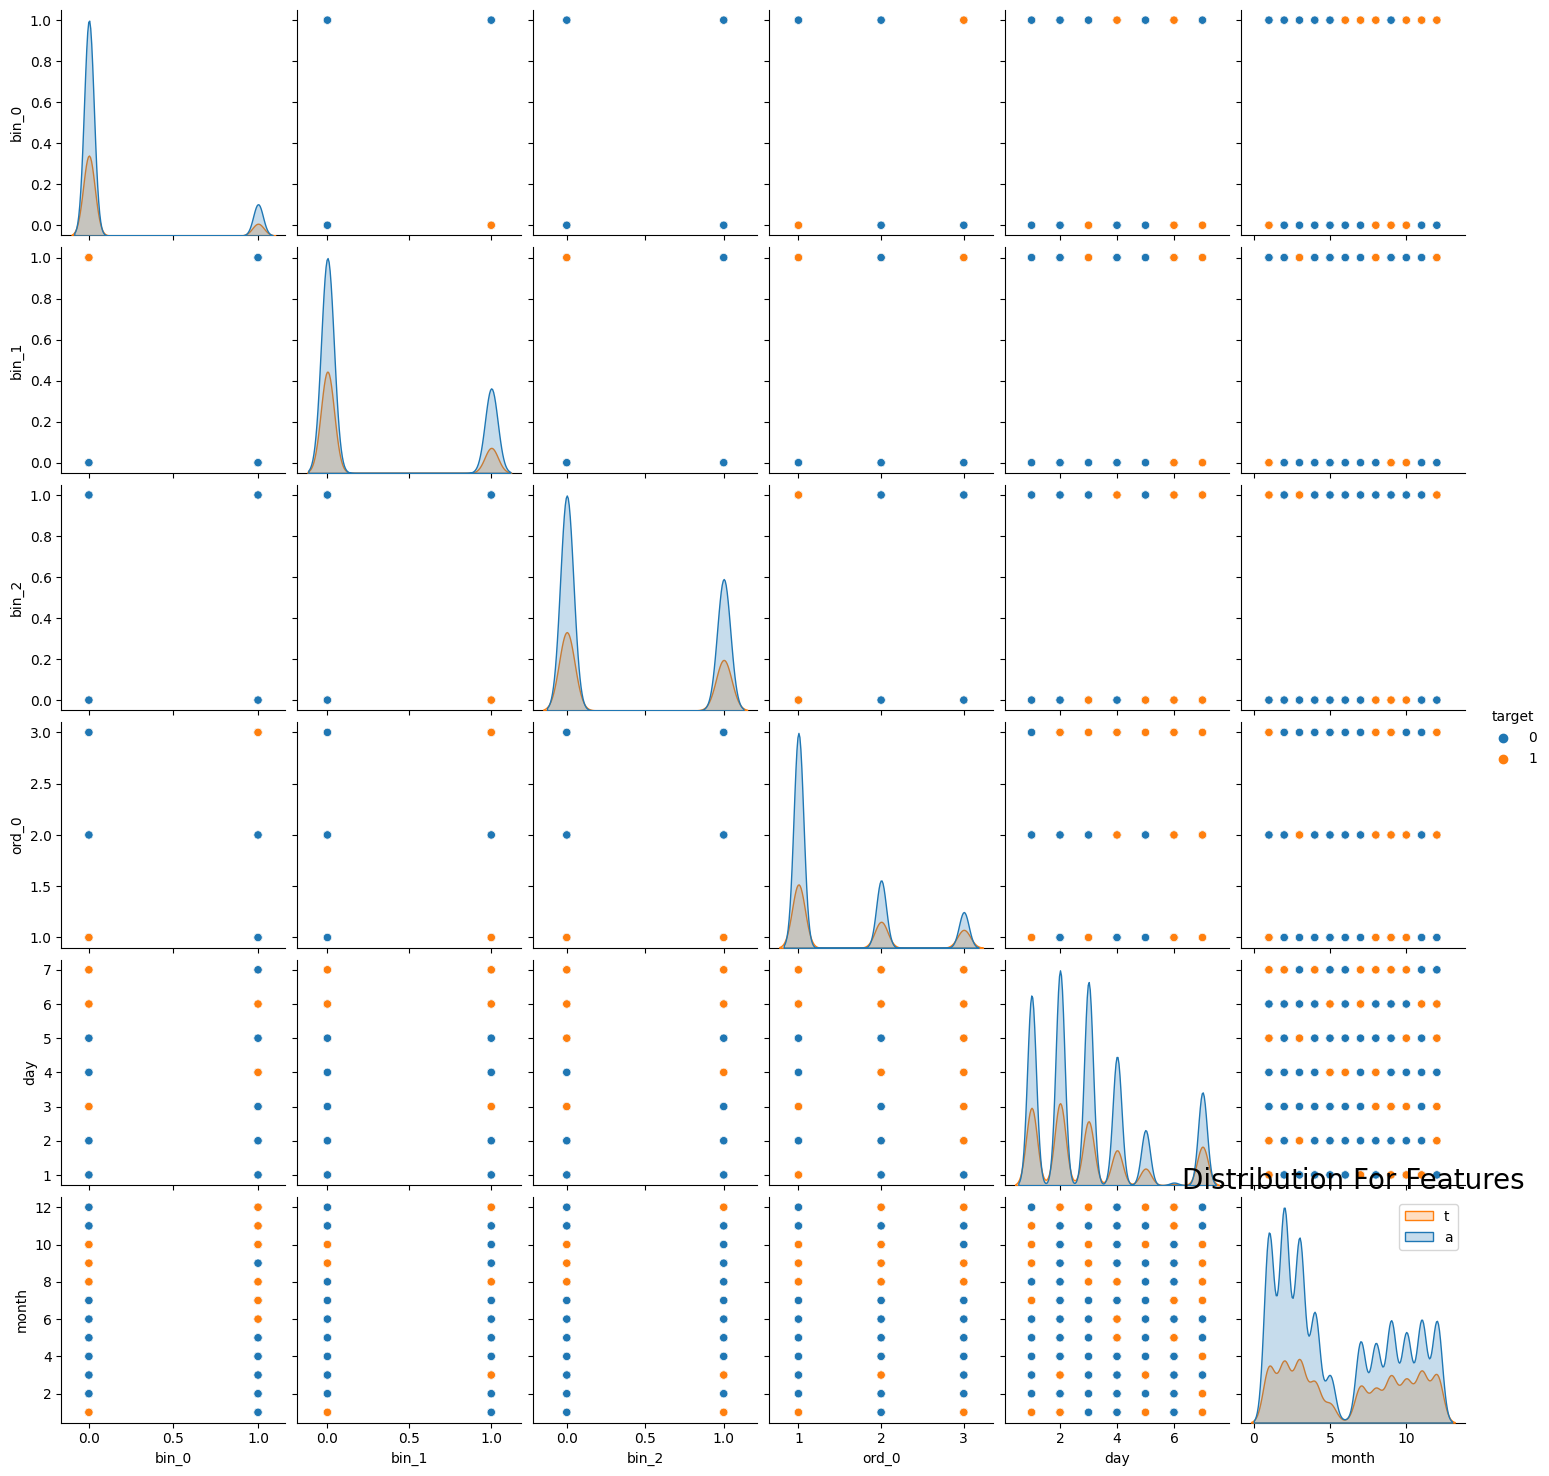

In [27]:
sns.pairplot(train[train.columns], hue='target')
plt.title('Distribution For Features',fontsize=20)
plt.legend('target')

# Object Columns

In [4]:
obj=train.select_dtypes(include=object).columns
pd.DataFrame(obj,columns=['Object Columns'])

,Object Columns
0,bin_3
1,bin_4
2,nom_0
3,nom_1
4,nom_2
5,nom_3
6,nom_4
7,nom_5
8,nom_6
9,nom_7


# Transform Object Columns

In [5]:
label=LabelEncoder()
for col in obj:
    train[col]=label.fit_transform(train[col])
    test[col]=label.fit_transform(test[col])
train

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,1,5,5,3,0,...,2175,2,2,1,7,3,136,2,2,0
1,0,1,0,1,1,1,4,3,5,2,...,11635,1,2,3,0,0,93,7,8,0
2,0,0,0,0,1,0,4,4,5,3,...,8078,1,1,4,7,17,31,7,2,0
3,0,1,0,0,1,2,4,5,0,1,...,6056,1,2,0,8,3,134,2,1,1
4,0,0,0,0,0,2,4,4,0,1,...,8231,1,2,2,0,17,158,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,1,0,2,4,5,4,1,...,10468,1,0,2,10,10,108,3,8,0
299996,0,0,0,0,1,1,4,4,5,2,...,5984,2,4,2,7,22,40,3,2,0
299997,0,0,0,0,1,0,3,0,5,1,...,2285,3,4,0,14,0,7,7,9,1
299998,0,1,0,0,1,1,2,0,2,2,...,7922,1,3,0,7,22,174,3,8,1


# Show Data Correlation

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
bin_0,1.000000,-0.001750,0.000459,-0.000504,-0.000829,-0.001331,0.000394,-0.000535,-0.001605,0.000693,...,-0.002042,0.001853,0.000941,0.000219,-0.000192,-0.000956,0.001685,0.002941,0.000617,0.002186
bin_1,-0.001750,1.000000,-0.003019,-0.001116,0.000901,-0.000715,-0.001157,-0.004210,-0.000823,-0.003156,...,-0.000257,-0.000182,-0.000624,-0.003044,-0.003142,-0.000990,0.003375,0.000610,-0.001314,-0.088899
bin_2,0.000459,-0.003019,1.000000,0.002741,-0.001816,-0.000797,0.003439,-0.002159,0.002919,0.000293,...,-0.002023,-0.000311,-0.000641,-0.001864,-0.001388,-0.000996,0.000932,0.000314,0.000370,0.011947
bin_3,-0.000504,-0.001116,0.002741,1.000000,-0.000452,0.000638,0.001470,-0.003918,0.000169,0.000466,...,-0.002375,0.000185,-0.002725,0.001378,0.001947,-0.001138,0.001055,-0.002018,0.000725,-0.007428
bin_4,-0.000829,0.000901,-0.001816,-0.000452,1.000000,0.000594,0.000342,-0.002141,-0.001753,-0.001495,...,0.000937,-0.000144,0.000715,0.000264,-0.000859,-0.003099,0.001316,-0.001359,0.000768,-0.045522
nom_0,-0.001331,-0.000715,-0.000797,0.000638,0.000594,1.000000,0.000584,0.002540,-0.001180,0.001874,...,-0.000667,0.002801,-0.001110,0.002321,0.000425,0.000255,0.002142,0.000240,-0.001758,0.092064
nom_1,0.000394,-0.001157,0.003439,0.001470,0.000342,0.000584,1.000000,0.001541,-0.000990,0.003171,...,0.002683,0.001569,-0.001640,0.001966,-0.002977,0.000213,0.001502,0.003335,0.001047,0.028226
nom_2,-0.000535,-0.004210,-0.002159,-0.003918,-0.002141,0.002540,0.001541,1.000000,-0.002646,-0.001828,...,0.005595,0.001685,-0.001106,0.001051,0.003273,-0.001511,0.001372,-0.001421,0.000314,-0.014100
nom_3,-0.001605,-0.000823,0.002919,0.000169,-0.001753,-0.001180,-0.000990,-0.002646,1.000000,-0.001529,...,0.004454,-0.004606,0.001360,-0.000042,-0.000189,-0.002002,-0.002625,-0.001899,-0.001277,-0.028362
nom_4,0.000693,-0.003156,0.000293,0.000466,-0.001495,0.001874,0.003171,-0.001828,-0.001529,1.000000,...,-0.001982,-0.003482,-0.001960,0.002297,-0.000325,-0.000470,0.000204,0.000568,0.001196,0.068582


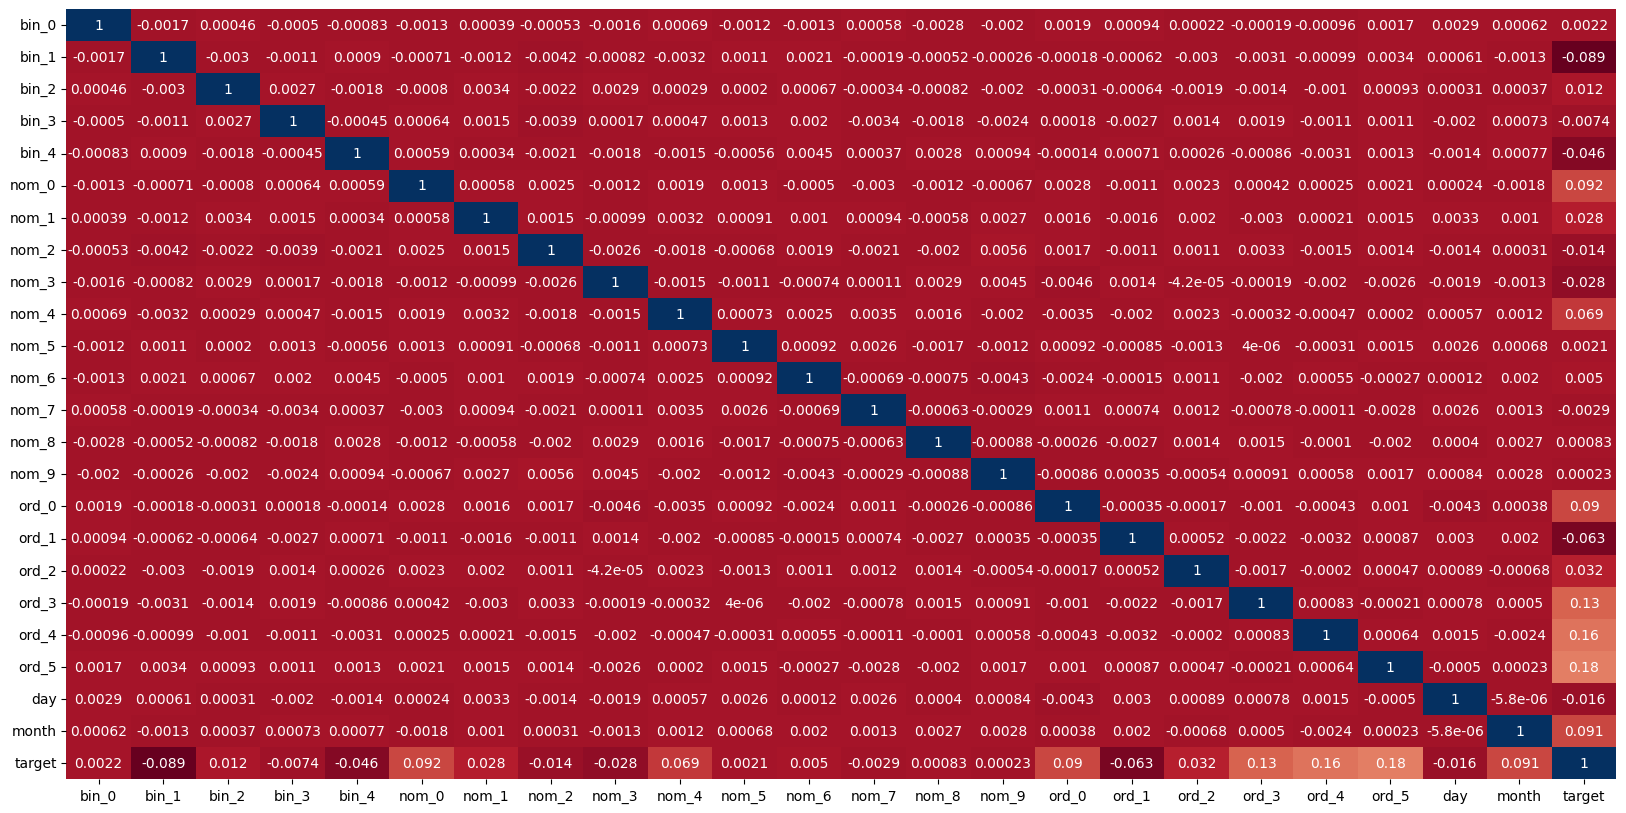

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,cbar=False,cmap='RdBu')
train.corr()

# Show Input X and Output y

In [6]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]
key=X.keys()

In [7]:
X

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,1,1,1,5,5,3,0,...,1686,2175,2,2,1,7,3,136,2,2
1,0,1,0,1,1,1,4,3,5,2,...,650,11635,1,2,3,0,0,93,7,8
2,0,0,0,0,1,0,4,4,5,3,...,1932,8078,1,1,4,7,17,31,7,2
3,0,1,0,0,1,2,4,5,0,1,...,629,6056,1,2,0,8,3,134,2,1
4,0,0,0,0,0,2,4,4,0,1,...,1760,8231,1,2,2,0,17,158,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,1,0,2,4,5,4,1,...,1029,10468,1,0,2,10,10,108,3,8
299996,0,0,0,0,1,1,4,4,5,2,...,486,5984,2,4,2,7,22,40,3,2
299997,0,0,0,0,1,0,3,0,5,1,...,803,2285,3,4,0,14,0,7,7,9
299998,0,1,0,0,1,1,2,0,2,2,...,301,7922,1,3,0,7,22,174,3,8


In [8]:
y

0         0
1         0
2         0
3         1
4         0
         ..
299995    0
299996    0
299997    1
299998    1
299999    0
Name: target, Length: 300000, dtype: int64

In [9]:
smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)
y.value_counts()

0    208236
1    208236
Name: target, dtype: int64

# Model Building

In [10]:
class Model:
    def select_feature(self,model,X,y):
        FeatureSelection = SelectFromModel(estimator =model)
        X = FeatureSelection.fit_transform(X, y)
        print('X Shape is ' , X.shape)
        return FeatureSelection.get_support()
    def GridSearchCV(self,model_choose,SelectedParameters,X,y):
        GridSearchModel = GridSearchCV(model_choose,SelectedParameters, cv = 2,return_train_score=True)
        GridSearchModel.fit(X, y)
        print('Best Score is :', GridSearchModel.best_score_)
        print('Best Parameters are :', GridSearchModel.best_params_)
        print('Best Estimator is :', GridSearchModel.best_estimator_)
    def Splitting_Data(self,X,y,test_size):
        X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=33, shuffle =True)
        print('X_train shape is ' ,X_train.shape)
        print('X_test shape is ' ,X_test.shape)
        print('y_train shape is ' ,y_train.shape)
        print('y_test shape is ' , y_test.shape)
        print('y_train value count is :\n' ,y_train.value_counts())
        print('y_test value count is :\n' ,y_test.value_counts())
        return X_train,X_test,y_train,y_test
    def MinMax(self,X):
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_scale = scaler.fit_transform(X)
        return pd.DataFrame(X_scale,columns=key)
    def model(self,model_bulding,X_train,y_train,X_test,y_test):
        model_bulding.fit(X_train,y_train)
        print('model_bulding Train Score is : ' , model_bulding.score(X_train,y_train))
        print('model_bulding Test Score is : ' , model_bulding.score(X_test,y_test))
        #print('model_bulding features importances are : ' , model_bulding.feature_importances_)
        return model_bulding
    def Prediction(self,model,X_test):
        self.y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)
        print('Predicted Value for model is : ' ,self.y_pred[:10])
        print('Prediction Probabilities Value for model is : ' , y_pred_prob[:10])
        return self.y_pred
    def Confusion_Matrix(self,y_test):
        ax= plt.subplot()
        CM = confusion_matrix(y_test,self.y_pred)
        sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels') 
        ax.set_title('Confusion Matrix')
        ax.xaxis.set_ticklabels(['Negative' ,'Positive']) 
        ax.yaxis.set_ticklabels(['Negative' ,'Positive'])
        plt.show()
        return CM
    def classificationReport(self,y_test):
        ClassificationReport = classification_report(y_test,self.y_pred)
        print('Classification Report is : ', ClassificationReport )
    def accuracy(self,y_test):
        acc = accuracy_score(y_test,self.y_pred)
        print('Accuracy Score is : ', acc)
    def f1_score(self,y_test):
        F1Score = f1_score(y_test,self.y_pred)
        print('F1 Score is : ', F1Score)
    def recall(self,y_test):
        RecallScore = recall_score(y_test,self.y_pred) 
        print('Recall Score is : ', RecallScore)
    def Precision(self,y_test):
        PrecisionScore = precision_score(y_test,self.y_pred) 
        print('Precision Score is : ', PrecisionScore)

In [11]:
model1=Model()

# MinMax

In [12]:
X=model1.MinMax(X)
test=model1.MinMax(test)
X

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,1.0,0.6,0.000000,...,0.761518,0.181553,0.5,0.50,0.2,0.500000,0.12,0.712042,0.166667,0.090909
1,0.0,1.0,0.0,1.0,1.0,0.5,0.8,0.6,1.0,0.666667,...,0.293586,0.971202,0.0,0.50,0.6,0.000000,0.00,0.486911,1.000000,0.636364
2,0.0,0.0,0.0,0.0,1.0,0.0,0.8,0.8,1.0,1.000000,...,0.872629,0.674290,0.0,0.25,0.8,0.500000,0.68,0.162304,1.000000,0.090909
3,0.0,1.0,0.0,0.0,1.0,1.0,0.8,1.0,0.0,0.333333,...,0.284101,0.505509,0.0,0.50,0.0,0.571429,0.12,0.701571,0.166667,0.000000
4,0.0,0.0,0.0,0.0,0.0,1.0,0.8,0.8,0.0,0.333333,...,0.794941,0.687062,0.0,0.50,0.4,0.000000,0.68,0.827225,1.000000,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416467,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.8,0.8,0.333333,...,0.658537,0.993656,0.0,0.50,0.4,0.500000,0.80,0.471204,0.500000,0.636364
416468,0.0,0.0,1.0,0.0,1.0,0.5,0.0,0.2,0.2,0.333333,...,0.411924,0.268197,0.5,0.25,0.0,0.571429,0.60,0.560209,0.833333,0.727273
416469,0.0,0.0,0.0,1.0,1.0,0.5,0.4,0.6,0.8,0.333333,...,0.736224,0.014023,0.0,0.25,0.0,0.428571,0.84,0.523560,0.833333,0.090909
416470,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.6,1.0,0.000000,...,0.809846,0.411436,0.0,0.75,0.6,0.071429,0.08,0.345550,0.166667,0.636364


# Splitting Data

In [13]:
X_train,X_test,y_train,y_test=model1.Splitting_Data(X,y,.05)

X_train shape is  (395648, 23)
X_test shape is  (20824, 23)
y_train shape is  (395648,)
y_test shape is  (20824,)
y_train value count is :
 1    197848
0    197800
Name: target, dtype: int64
y_test value count is :
 0    10436
1    10388
Name: target, dtype: int64


# RandomForestClassifier

In [14]:
feature1=model1.select_feature(RandomForestClassifier(n_estimators=200,max_depth=10,random_state=33),X,y)
X.iloc[:,feature1]

X Shape is  (416472, 7)


,bin_1,bin_4,nom_3,ord_1,ord_3,ord_4,ord_5
0,0.0,1.0,0.6,0.50,0.500000,0.12,0.712042
1,1.0,1.0,1.0,0.50,0.000000,0.00,0.486911
2,0.0,1.0,1.0,0.25,0.500000,0.68,0.162304
3,1.0,1.0,0.0,0.50,0.571429,0.12,0.701571
4,0.0,0.0,0.0,0.50,0.000000,0.68,0.827225
...,...,...,...,...,...,...,...
416467,0.0,1.0,0.8,0.50,0.500000,0.80,0.471204
416468,0.0,1.0,0.2,0.25,0.571429,0.60,0.560209
416469,0.0,1.0,0.8,0.25,0.428571,0.84,0.523560
416470,0.0,0.0,1.0,0.75,0.071429,0.08,0.345550


In [15]:
model1.GridSearchCV(RandomForestClassifier(n_estimators=200,max_depth=10,random_state=33),
                   {'max_depth':[5,10,15,20,25,30,35,40]},X.iloc[:,feature1],y)

Best Score is : 0.6795847019727617
Best Parameters are : {'max_depth': 10}
Best Estimator is : RandomForestClassifier(max_depth=10, n_estimators=200, random_state=33)


In [20]:
model_RandomForest=model1.model(RandomForestClassifier(n_estimators=200,max_depth=15,random_state=33)
                                ,X_train,y_train,X_test,y_test)

model_bulding Train Score is :  0.8452361695244257
model_bulding Test Score is :  0.7506242796772954


# XGBClassifier

In [21]:
feature2=model1.select_feature(xgb.XGBClassifier(max_depth=10),X,y)
X.iloc[:,feature2]

X Shape is  (416472, 4)


,bin_1,bin_3,bin_4,ord_1
0,0.0,1.0,1.0,0.50
1,1.0,1.0,1.0,0.50
2,0.0,0.0,1.0,0.25
3,1.0,0.0,1.0,0.50
4,0.0,0.0,0.0,0.50
...,...,...,...,...
416467,0.0,0.0,1.0,0.50
416468,0.0,0.0,1.0,0.25
416469,0.0,1.0,1.0,0.25
416470,0.0,0.0,0.0,0.75


In [22]:
model1.GridSearchCV(xgb.XGBClassifier(max_depth=10),
                   {'max_depth':[15,20,25,30,35,40,45,50]},X,y)

Best Score is : 0.6877437138631168
Best Parameters are : {'max_depth': 15}
Best Estimator is : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [26]:
xgb_classifier=model1.model(xgb.XGBClassifier(max_depth=15),X_train,y_train,X_test,y_test)

model_bulding Train Score is :  0.9997902175671304
model_bulding Test Score is :  0.7804456396465617


# DecisionTreeClassifier

In [27]:
feature3=model1.select_feature(DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=33),X,y)
X.iloc[:,feature3]

X Shape is  (416472, 7)


,bin_1,bin_4,nom_3,ord_1,ord_3,ord_4,ord_5
0,0.0,1.0,0.6,0.50,0.500000,0.12,0.712042
1,1.0,1.0,1.0,0.50,0.000000,0.00,0.486911
2,0.0,1.0,1.0,0.25,0.500000,0.68,0.162304
3,1.0,1.0,0.0,0.50,0.571429,0.12,0.701571
4,0.0,0.0,0.0,0.50,0.000000,0.68,0.827225
...,...,...,...,...,...,...,...
416467,0.0,1.0,0.8,0.50,0.500000,0.80,0.471204
416468,0.0,1.0,0.2,0.25,0.571429,0.60,0.560209
416469,0.0,1.0,0.8,0.25,0.428571,0.84,0.523560
416470,0.0,0.0,1.0,0.75,0.071429,0.08,0.345550


In [28]:
model1.GridSearchCV(DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=33),
                   {'max_depth':[15,20,25,30,35,40,45,50]},X,y)

Best Score is : 0.6441609519967728
Best Parameters are : {'max_depth': 15}
Best Estimator is : DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=33)


In [32]:
model_DecisionTree=model1.model(DecisionTreeClassifier(criterion='entropy',max_depth=15,random_state=33),
                               X_train,y_train,X_test,y_test)

model_bulding Train Score is :  0.7954292704626335
model_bulding Test Score is :  0.7068286592393392


# VotingClassifier

In [33]:
VotingClassifierModel=model1.model(VotingClassifier(estimators=[('model_RandomForest',model_RandomForest),
                                                                ('model_DecisionTree',model_DecisionTree),
                                                                ('xgb_classifier',xgb_classifier)], voting='hard'),
                                      X_train,y_train,X_test,y_test)

model_bulding Train Score is :  0.8917547921384665
model_bulding Test Score is :  0.7607087975412985


# Summary

In [34]:
models={'RandomForestClassifier':{'Train':84.5,'Test':75.1}
        ,'DecisionTreeClassifier':{'Train':99.9,'Test':78}
       ,'XGBClassifier':{'Train':79.5,'Test':70.1}
       ,'VotingClassifier':{'Train':89.2,'Test':76.1}}
pd.DataFrame(models)

,RandomForestClassifier,DecisionTreeClassifier,XGBClassifier,VotingClassifier
Train,84.5,99.9,79.5,89.2
Test,75.1,78.0,70.1,76.1


# Feature Importances

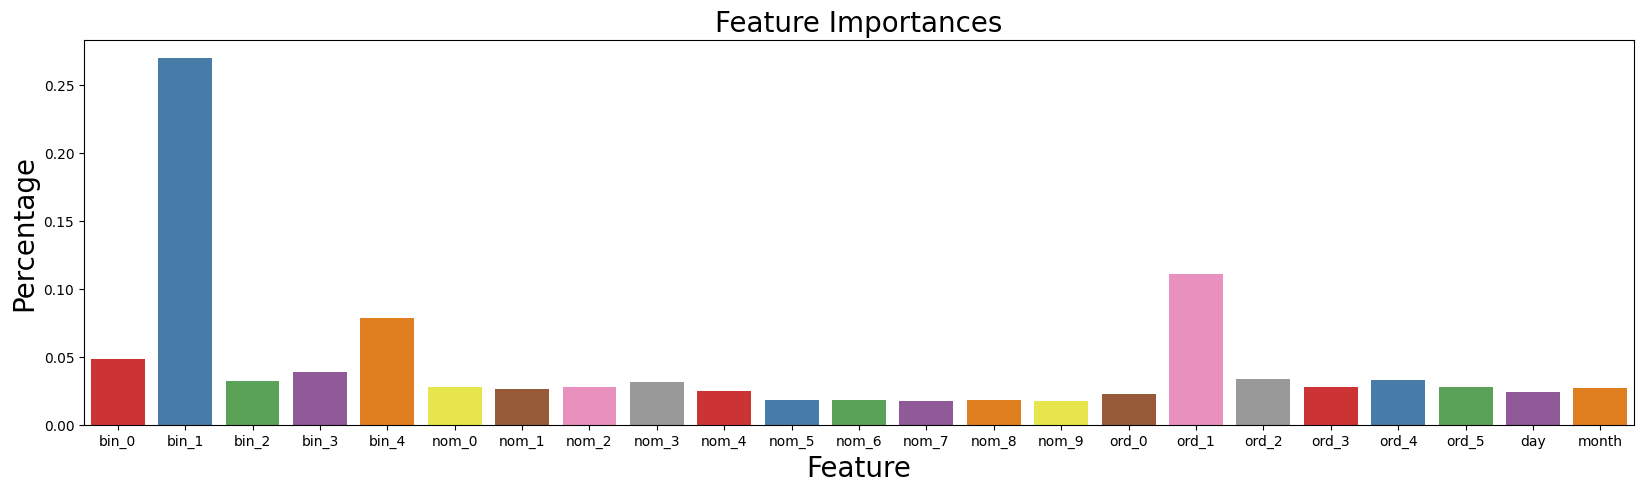

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(x=key,y=xgb_classifier.feature_importances_,palette='Set1')
plt.title('Feature Importances',fontsize=20)
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Percentage',fontsize=20)
plt.show()

# Prediction

In [37]:
y_pred=model1.Prediction(xgb_classifier,X_test)

Predicted Value for model is :  [0 1 0 0 1 0 1 1 1 1]
Prediction Probabilities Value for model is :  [[0.8919468  0.10805322]
 [0.2610168  0.7389832 ]
 [0.68068475 0.31931525]
 [0.8689668  0.13103317]
 [0.14692014 0.85307986]
 [0.934749   0.06525097]
 [0.09724063 0.9027594 ]
 [0.06518191 0.9348181 ]
 [0.00147671 0.9985233 ]
 [0.01031649 0.9896835 ]]


In [38]:
df=pd.DataFrame()
df['actual_y'],df['pred']=y_test,y_pred
df

,actual_y,pred
237728,0,0
167948,1,1
41723,0,0
292253,0,0
110974,1,1
...,...,...
370582,1,1
342859,1,1
66919,0,0
330199,1,1


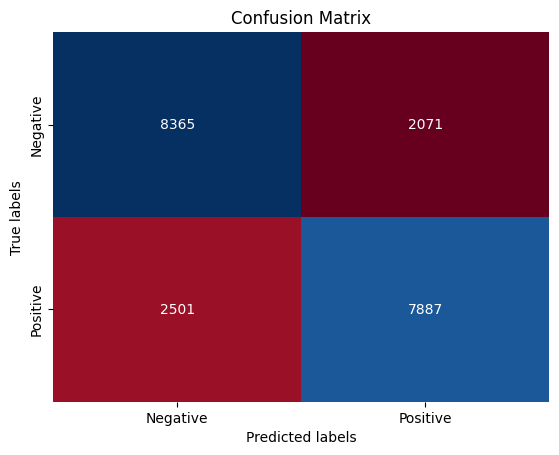

array([[8365, 2071],
       [2501, 7887]])

In [39]:
model1.Confusion_Matrix(y_test)

In [40]:
model1.accuracy(y_test)

Accuracy Score is :  0.7804456396465617


In [41]:
model1.f1_score(y_test)

F1 Score is :  0.7752875258035977


In [42]:
model1.recall(y_test)

Recall Score is :  0.7592414324220255


In [43]:
model1.Precision(y_test)

Precision Score is :  0.7920265113476602


In [44]:
model1.classificationReport(y_test)

Classification Report is :                precision    recall  f1-score   support

           0       0.77      0.80      0.79     10436
           1       0.79      0.76      0.78     10388

    accuracy                           0.78     20824
   macro avg       0.78      0.78      0.78     20824
weighted avg       0.78      0.78      0.78     20824



In [45]:
y_test_pred=xgb_classifier.predict(test)

In [48]:
pred=pd.DataFrame(index=id)
pred['target']=y_test_pred
pred.to_csv('/kaggle/working/prediction.csv')
pred

,target
id,
300000,0
300001,0
300002,0
300003,0
300004,1
...,...
499995,0
499996,0
499997,0
